## ENUNCIADO:

### Context

World Happiness Report is a historic survey on the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 update. The World Happiness 2017, which ranks 155 countries according to their levels of happiness, was launched at the United Nations in an event celebrating the International Day of Happiness on March 20. The report continues to gain worldwide recognition as governments, organizations, and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts in all fields (economics, psychology, survey analysis, national statistics, health, public policy, and more) describe how well-being measurements can be effectively used to assess the progress of nations.



### Content

The happiness scores and rankings utilize data from the Gallup World Poll. Scores are based on responses to the main life evaluation question asked in the survey. This question, known as the Cantril ladder, asks respondents to imagine a ladder with the best possible life for them being a 10 and the worst possible life being a 0, and then rate their own current lives on that scale. The scores are derived from nationally representative samples for the years 2013-2016 and use Gallup weights to make the estimates representative. The columns following the happiness score estimate the extent to which each of the six factors (economic production, social support, life expectancy, freedom, absence of corruption, and generosity) contribute to making life evaluations higher in each country than in the dystopia, a hypothetical country that has values equal to the lowest national averages in the world for each of the six factors. They do not impact the reported total score for each country but do explain why some countries have a higher ranking than others.

### What is dystopia?

The dystopia is an imaginary country that has the least happy people in the world. The purpose of establishing the dystopia is to have a benchmark against which all countries can be favorably compared (no country performs worse than the dystopia) in terms of each of the six key variables, allowing each bar to be positively wide. The lowest scores observed for the six key variables, therefore, characterize the dystopia. Life would be very unpleasant in a country with the lowest income in the world, the lowest life expectancy, the lowest generosity, the most corruption, the least freedom, and the least social support, in contrast to utopia.

All the dataset information can be expanded from the following link:
https://www.kaggle.com/unsdsn/world-happiness

### SE PIDE:

Sobre los informes de felicidad de 2015 y 2016, realizar las siguientes exploraciones:

### 1. Load the two CSV files as datasets.

In [1]:
import pandas as pd
df15 = pd.read_csv('datasets/informe felicidad 2015.csv')
df16 = pd.read_csv('datasets/informe felicidad 2016.csv')

### 2. Identifying the columns of both datasets: Are there any differences between them?

In [2]:
columns_2015 = df15.columns
columns_2016 = df16.columns
print("The 2015 Happiness Report has a total of", len(columns_2015), "columns. They are:")
print(columns_2015)
print("\n")
print("The 2016 Happiness Report has a total of", len(columns_2016), "columns. They are:")
print(columns_2016)

The 2015 Happiness Report has a total of 12 columns. They are:
Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')


The 2016 Happiness Report has a total of 13 columns. They are:
Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')


At first glance, we can see that the 2016 Happiness Report has one more column than the 2015 report. To determine which columns from the 2015 Happiness Report do not match those of the 2016 report (and vice versa), we define the following function:

In [3]:
def compare_columns(columnsA, columnsB):
    col_A_not_in_col_B = []
    cont = 0
    for c in columnsA:
        if c in columnsB:
            pass
        else:
            col_A_not_in_col_B.append(c)
        cont = cont + 1
    return(', '.join(col_A_not_in_col_B))

In [4]:
print("The following columns from the 2015 Happiness Report are not found in the 2016 report:")
print("\n")
print("   ", compare_columns(columns_2015, columns_2016))
print("\n")
print("The following columns from the 2016 Happiness Report are not found in the 2015 report:")
print("\n")
print("   ", compare_columns(columns_2016, columns_2015))
print("\n")
print("The remaining columns are consistent across both datasets. They are:")
print("\n")
matching_columns = ', '.join([x for x in columns_2015 if x != "Standard Error"])
print("   ", matching_columns)

The following columns from the 2015 Happiness Report are not found in the 2016 report:


    Standard Error


The following columns from the 2016 Happiness Report are not found in the 2015 report:


    Lower Confidence Interval, Upper Confidence Interval


The remaining columns are consistent across both datasets. They are:


    Country, Region, Happiness Rank, Happiness Score, Economy (GDP per Capita), Family, Health (Life Expectancy), Freedom, Trust (Government Corruption), Generosity, Dystopia Residual


### 3. Merge both DataFrames, regardless of whether they share the same differences.

In [5]:
dfUnited = pd.concat([df15, df16], ignore_index=True)
dfUnited.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Lower Confidence Interval,Upper Confidence Interval
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,NaN,NaN
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,NaN,NaN
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,NaN,NaN
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,NaN,NaN
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,NaN,NaN


### 4. Check the number of nulls for each column, as well as their percentage.

In [6]:
print("*Number of null values for each column:")
print(dfUnited.isnull().sum())
print("----------------------------------")
print("*Percentage of null values for each column:")
print(dfUnited.isnull().sum() / len(dfUnited) * 100)

*Number of null values for each column:
Country                            0
Region                             0
Happiness Rank                     0
Happiness Score                    0
Standard Error                   157
Economy (GDP per Capita)           0
Family                             0
Health (Life Expectancy)           0
Freedom                            0
Trust (Government Corruption)      0
Generosity                         0
Dystopia Residual                  0
Lower Confidence Interval        158
Upper Confidence Interval        158
dtype: int64
----------------------------------
*Percentage of null values for each column:
Country                           0.00000
Region                            0.00000
Happiness Rank                    0.00000
Happiness Score                   0.00000
Standard Error                   49.84127
Economy (GDP per Capita)          0.00000
Family                            0.00000
Health (Life Expectancy)          0.00000
Freedom       

*We observe that the null values are located in the non-matching columns. Therefore, the total number of nulls corresponds to the total number of records in the dataframe that does not contain that column.*

### 5. Replace the null values in the "Lower Confidence Interval" and "Upper Confidence Interval" columns with a random number between the minimum and maximum value of the respective column (a single number, it is not necessary to have a different one for each row with a null value).

In [7]:
# Import the random library
import random

# Create variables corresponding to the minimums and maximums in the "Lower Confidence Interval" and "Upper Confidence Interval" columns
minLower = dfUnited['Lower Confidence Interval'].min()
maxLower = dfUnited['Lower Confidence Interval'].max()
minUpper = dfUnited['Upper Confidence Interval'].min()
maxUpper = dfUnited['Upper Confidence Interval'].max()

# Create variables containing the random value between the maximum and minimum value of each column
randLower = round(random.uniform(minLower, maxLower), 3)
randUpper = round(random.uniform(minLower, maxLower), 3)

# Finally, modify the null values with the random value
dfUnited['Lower Confidence Interval'] = dfUnited['Lower Confidence Interval'].fillna(randLower)
dfUnited['Upper Confidence Interval'] = dfUnited['Upper Confidence Interval'].fillna(randUpper)

# Show that there are no longer null values for these columns
print("We observe that the columns 'Lower Confidence Interval' and 'Upper Confidence Interval' no longer have null values:")
print("\n")
print(dfUnited.isnull().sum())
print("\n")

# Show the value that nulls have been replaced with for both columns
print("We observe that for the 'Lower Confidence Interval' column, we now have a total of 158 records with a value of " + str(randLower) + " instead of nulls:")
print("\n")
dfUnitedGrouped = dfUnited.groupby(['Lower Confidence Interval']).size().sort_values(ascending=False)
print(dfUnitedGrouped)
print("\n")

print("We observe that for the 'Upper Confidence Interval' column, we now have a total of 158 records with a value of " + str(randUpper) + " instead of nulls:")
print("\n")
dfUnitedGrouped = dfUnited.groupby(['Upper Confidence Interval']).size().sort_values(ascending=False)
print(dfUnitedGrouped)


We observe that the columns 'Lower Confidence Interval' and 'Upper Confidence Interval' no longer have null values:


Country                            0
Region                             0
Happiness Rank                     0
Happiness Score                    0
Standard Error                   157
Economy (GDP per Capita)           0
Family                             0
Health (Life Expectancy)           0
Freedom                            0
Trust (Government Corruption)      0
Generosity                         0
Dystopia Residual                  0
Lower Confidence Interval          0
Upper Confidence Interval          0
dtype: int64


We observe that for the 'Lower Confidence Interval' column, we now have a total of 158 records with a value of 7.426 instead of nulls:


Lower Confidence Interval
7.426    158
3.621      2
4.259      2
4.750      2
5.921      1
        ... 
4.923      1
4.934      1
4.935      1
4.965      1
7.460      1
Length: 155, dtype: int64


We observe that

### 6. Replace the null values in the "Standard Error" column with their squared mean.

In [8]:
# Get the squared mean of the values in the "Standard Error" column
meanpower2 = round(dfUnited['Standard Error'].mean() ** 2, 6)
print(meanpower2)
dfUnited['Standard Error'] = dfUnited['Standard Error'].fillna(meanpower2)

# Show that there are no longer null values for this column
print("We observe that the 'Standard Error' column no longer has null values:")
print("\n")
print(dfUnited.isnull().sum())
print("\n")

# Show the value that nulls have been replaced with for the 'Standard Error' column
print("We observe that for the 'Standard Error' column, we now have a total of 157 records with a value of 0.002293 instead of nulls:")
print("\n")
print(dfUnited[round(dfUnited['Standard Error'], 6) == 0.002293].groupby(['Standard Error']).size().sort_values(ascending=False))

0.002293
We observe that the 'Standard Error' column no longer has null values:


Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
Lower Confidence Interval        0
Upper Confidence Interval        0
dtype: int64


We observe that for the 'Standard Error' column, we now have a total of 157 records with a value of 0.002293 instead of nulls:


Standard Error
0.002293    157
dtype: int64


### 7. Get a statistical summary of the dataframe without null values.

In [9]:
dfUnited.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Lower Confidence Interval,Upper Confidence Interval
count,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000
mean,79.238095,5.378949,0.025161,0.899837,0.892647,0.594054,0.399896,0.140532,0.239957,2.212032,6.357600,6.182705
std,45.538922,1.141531,0.025851,0.410780,0.286718,0.240790,0.150684,0.115490,0.130077,0.558728,1.344325,1.063562
min,1.000000,2.839000,0.002293,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580,2.732000,3.078000
25%,40.000000,4.510000,0.002293,0.594900,0.739880,0.419645,0.295890,0.061315,0.151430,1.884135,5.266000,5.451000
50%,79.000000,5.286000,0.018480,0.973060,0.937930,0.640450,0.413190,0.106130,0.218540,2.211260,7.426000,6.879000
75%,118.500000,6.269000,0.043940,1.229000,1.087360,0.787640,0.516730,0.178610,0.311450,2.563470,7.426000,6.879000
max,158.000000,7.587000,0.136930,1.824270,1.402230,1.025250,0.669730,0.551910,0.819710,3.837720,7.460000,7.669000


### 8. Show graphically the relationship between family and health.

C:\Users\jrnpj\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


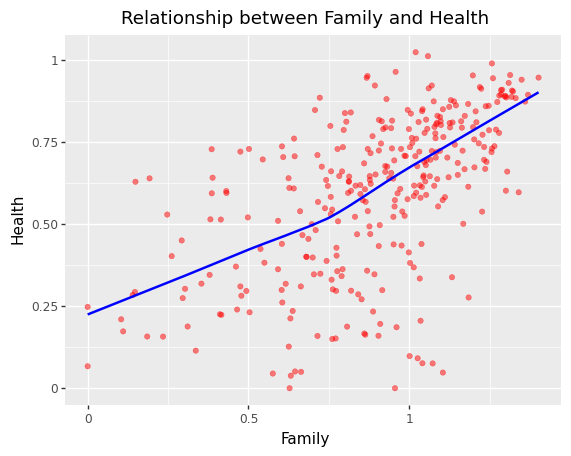

<ggplot: (86947312713)>

In [10]:
from plotnine import *
(
    ggplot(dfUnited) +
     geom_point(aes(x='Family', y = 'Health (Life Expectancy)'), color= 'red',
               alpha=0.5,
               shape='o',
               size = 2,
               stroke = 0.2) 
    +
    geom_smooth(
        aes(x='Family', y = 'Health (Life Expectancy)'), color= 'blue')
        
    + labs(title='Relationship between Family and Health', 
         x = 'Family',
         y = 'Health')
    )


### 9. Graphically illustrate the relationship between happiness score and trust (government corruption).

C:\Users\jrnpj\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


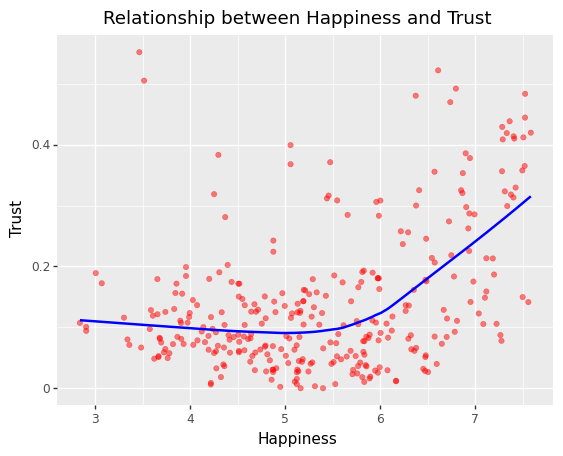

<ggplot: (86949608003)>

In [11]:
(
    ggplot(dfUnited) +
     geom_point(aes(x='Happiness Score', y = 'Trust (Government Corruption)'), color= 'red',
               alpha=0.5,
               shape='o',
               size = 2,
               stroke = 0.2) 
    +
    geom_smooth(
        aes(x='Happiness Score', y = 'Trust (Government Corruption)'), color= 'blue')
        
    + labs(title='Relationship between Happiness and Trust', 
         x = 'Happiness',
         y = 'Trust')
    )


### 10. Display the correlation matrix of the dataframe.

In [13]:
dfUnited.corr(numeric_only=True)

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Lower Confidence Interval,Upper Confidence Interval
Happiness Rank,1.000000,-0.993905,0.057798,-0.783247,-0.686502,-0.741182,-0.545570,-0.378864,-0.152613,-0.522146,-0.416946,-0.523952
Happiness Score,-0.993905,1.000000,-0.061461,0.779171,0.693547,0.734491,0.556414,0.397989,0.168272,0.526343,0.421851,0.528809
Standard Error,0.057798,-0.061461,1.000000,-0.186844,0.266522,0.027844,0.126096,-0.039259,-0.046720,-0.151971,0.705275,0.580978
Economy (GDP per Capita),-0.783247,0.779171,-0.186844,1.000000,0.566283,0.789103,0.331127,0.294856,-0.015402,0.079411,0.232056,0.334389
Family,-0.686502,0.693547,0.266522,0.566283,1.000000,0.569937,0.476671,0.205060,0.075987,0.053264,0.568014,0.590382
Health (Life Expectancy),-0.741182,0.734491,0.027844,0.789103,0.569937,1.000000,0.369799,0.249773,0.088002,0.025248,0.431478,0.484060
Freedom,-0.545570,0.556414,0.126096,0.331127,0.476671,0.369799,1.000000,0.492875,0.356615,0.034829,0.385164,0.416233
Trust (Government Corruption),-0.378864,0.397989,-0.039259,0.294856,0.205060,0.249773,0.492875,1.000000,0.289499,-0.023504,0.185219,0.220081
Generosity,-0.152613,0.168272,-0.046720,-0.015402,0.075987,0.088002,0.356615,0.289499,1.000000,-0.110632,0.052527,0.071362
Dystopia Residual,-0.522146,0.526343,-0.151971,0.079411,0.053264,0.025248,0.034829,-0.023504,-0.110632,1.000000,0.059491,0.148674


### 11. After merging the dataframes, countries may appear more than once. Display the dataframe grouped by country with the maximum happiness value, regardless of the year.

In [14]:
dfUnited.groupby(['Country']).max()['Happiness Score']

Country
Afghanistan    3.575
Albania        4.959
Algeria        6.355
Angola         4.033
Argentina      6.650
               ...  
Venezuela      6.810
Vietnam        5.360
Yemen          4.077
Zambia         5.129
Zimbabwe       4.610
Name: Happiness Score, Length: 164, dtype: float64

### 12. Is there a relationship between happiness and generosity? Show it graphically through the freedom score.

C:\Users\jrnpj\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


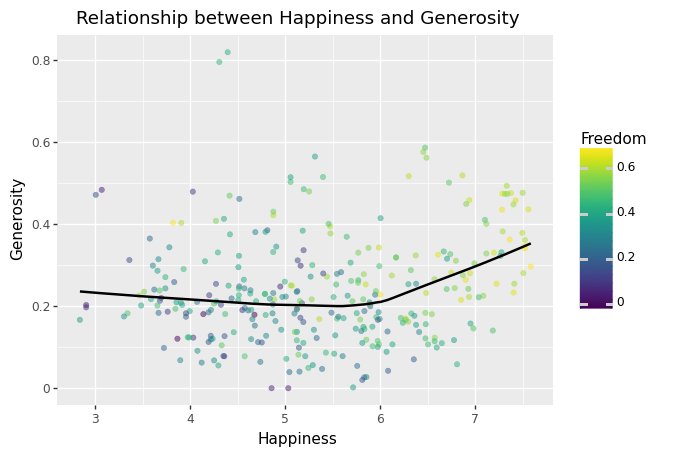

<ggplot: (86949808481)>

In [16]:
(
    ggplot(dfUnited) +
     geom_point(aes(x='Happiness Score', y = 'Generosity', color = 'Freedom'), 
               alpha=0.5,
               shape='o',
               size = 2,
               stroke = 0.2) 
    + geom_smooth(
        aes(x='Happiness Score', y = 'Generosity')
    )    
            
    + labs(title='Relationship between Happiness and Generosity', 
         x = 'Happiness',
         y = 'Generosity',
          color = 'Freedom')
)


### 13. Display the distribution of the dystopia residual based on region.

C:\Users\jrnpj\anaconda3\lib\site-packages\plotnine\utils.py:317: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
C:\Users\jrnpj\anaconda3\lib\site-packages\plotnine\utils.py:317: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
C:\Users\jrnpj\anaconda3\lib\site-packages\plotnine\utils.py:1231: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
C:\Users\jrnpj\anaconda3\lib\site-packages\plotnine\utils.py:317: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
C:\Users\jrnpj\anaconda3\lib\site-packages\plotnine\utils.py:635: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pan

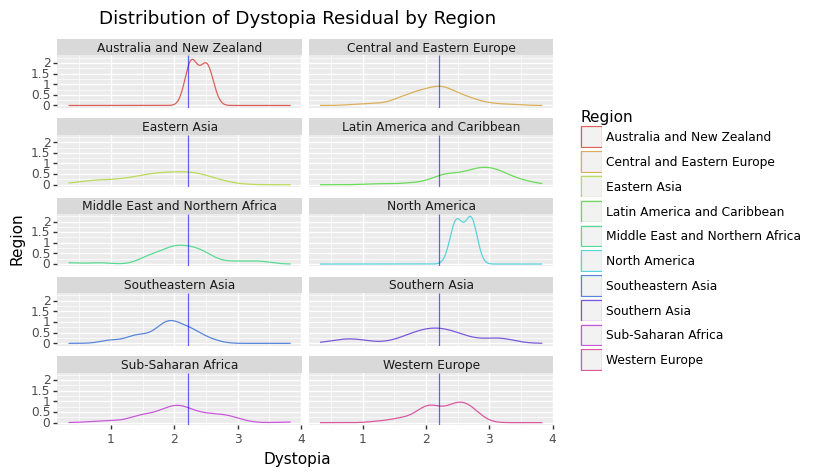

<ggplot: (86949953232)>

In [18]:
(ggplot(dfUnited, aes(x='Dystopia Residual', color='Region')) +
    geom_density() +
    labs(title="Distribution of Dystopia Residual by Region",
         x="Dystopia", y="Region")  
 + geom_vline(aes(xintercept = dfUnited['Dystopia Residual'].mean()), color = 'blue', alpha = 0.6,
             linetype = 'solid')
  + facet_wrap('~Region', ncol = 2)
)
